beamforming weights:  (1+0j) (2.83276944882399e-16-1j) (-1-5.66553889764798e-16j) (-1.0718754395722282e-15+1j)
[ 1.        +0.j         -0.01431666+0.99989751j -0.99959007-0.0286304j
  0.04293826-0.99907773j  0.9983606 +0.05723732j -0.07152465+0.99743883j
 -0.99631261-0.08579731j  0.10005239-0.99498217j  0.99344778+0.11428696j
 -0.12849811+0.99170975j -0.98976845-0.14268292j  0.15683848-0.98762427j
  0.98527764+0.17096189j -0.18505026+0.98272906j -0.97997904-0.19910069j
  0.21311032-0.97702814j  0.97387698+0.22707626j -0.24099566+0.97052619j
 -0.96697647-0.25486566j  0.26868342-0.96322854j  0.95928317+0.2824461j
 -0.29615089+0.95514117j -0.95080338-0.30979497j  0.32337556-0.94627071j
  0.94154407+0.33688985j -0.3503351 +0.93662443j -0.9315128 -0.36370853j
  0.37700741-0.92621024j  0.92071783+0.39022901j -0.40337063+0.91503669j
 -0.90916798-0.41642956j  0.42940313-0.90311292j  0.89687274+0.44228869j
 -0.45508359+0.89044872j -0.88384218-0.4677852j   0.48039093-0.87705448j
  0.87008699+0.

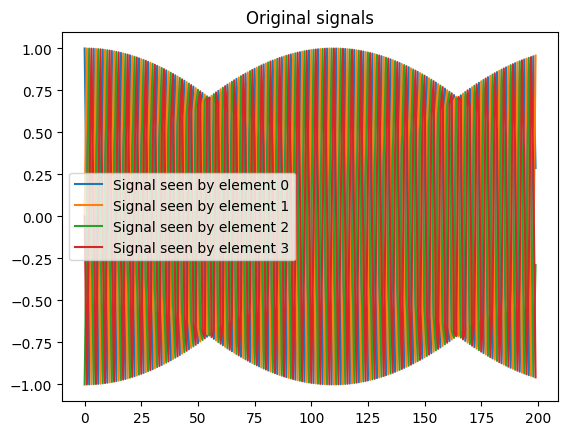

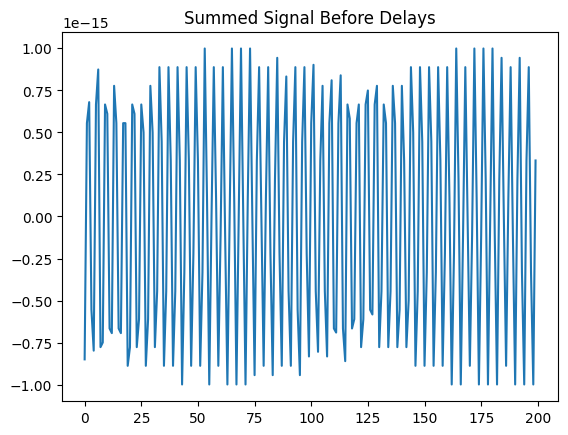

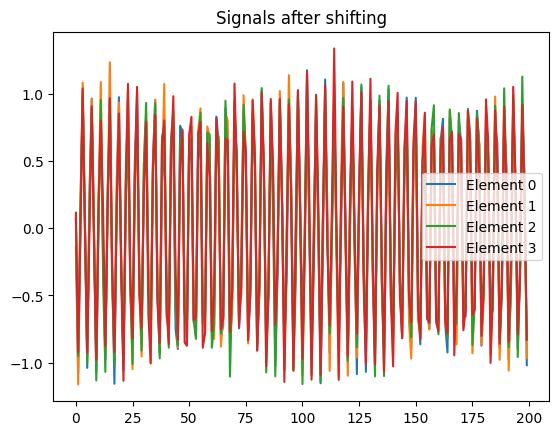

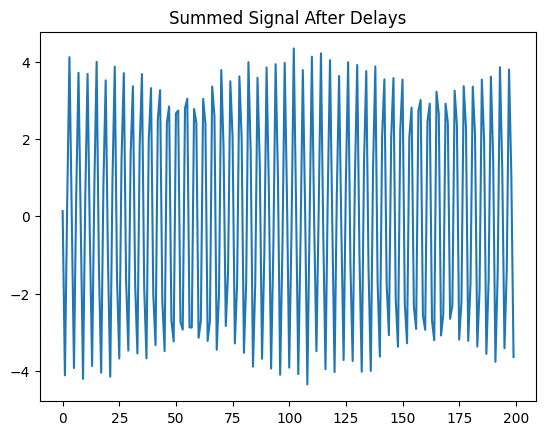

Average Error:  0.03728856367636049


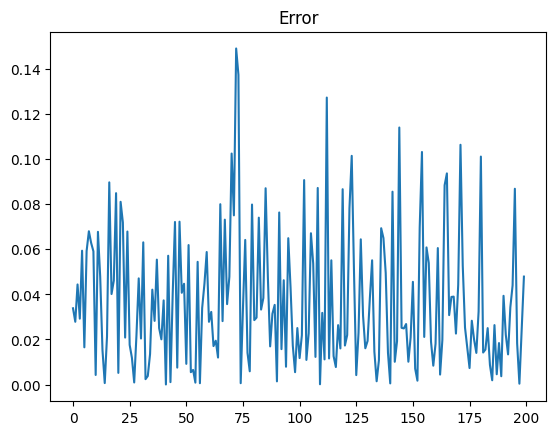

In [68]:
# This file is being used to test interpolation functions in order to smooth out ADC data for visual display


import numpy as np
import matplotlib.pyplot as plt

N = 200 # number of samples to simulate
d = 0.5 # half wavelength spacing
Nr = 4
theta_degrees = 30 # direction of arrival (feel free to change this, it's arbitrary)
theta = theta_degrees / 180 * np.pi # convert to radians

# Create 4 tones to simulate signals being seen by each element

f_tone = 1.24e9
sample_rate = 4915.2e6
t = np.arange(N)/sample_rate # time vector
tx = np.exp(2j * np.pi * f_tone * t)
b_0 = np.exp(-2j * np.pi * d * 0 * np.sin(theta)) # array factor
b_1 = np.exp(-2j * np.pi * d * 1 * np.sin(theta)) # array factor
b_2 = np.exp(-2j * np.pi * d * 2 * np.sin(theta)) # array factor
b_3 = np.exp(-2j * np.pi * d * 3 * np.sin(theta)) # array factor

print("beamforming weights: ", b_0, b_1, b_2, b_3)


tx_0 = tx * b_0
tx_1 = tx * b_1
tx_2 = tx * b_2
tx_3 = tx * b_3

print(tx_0)
# tx_0 = np.exp(2j * np.pi * f_tone * (t-(0*shift*(1/sample_rate))))
# tx_1 = np.exp(2j * np.pi * f_tone * (t-(1*shift*(1/sample_rate))))
# tx_2 = np.exp(2j * np.pi * f_tone * (t-(2*shift*(1/sample_rate))))
# tx_3 = np.exp(2j * np.pi * f_tone * (t-(3*shift*(1/sample_rate))))

# tx_list = [tx_0, tx_1, tx_2, tx_3]


plt.plot(np.asarray(tx_0).squeeze().real[0:200], label="Signal seen by element 0")
plt.plot(np.asarray(tx_1).squeeze().real[0:200], label="Signal seen by element 1")
plt.plot(np.asarray(tx_2).squeeze().real[0:200], label="Signal seen by element 2")
plt.plot(np.asarray(tx_3).squeeze().real[0:200], label="Signal seen by element 3")
plt.title("Original signals")
plt.legend()
plt.show()

r = []
r.append(b_3*tx_0)
r.append(b_2*tx_1)
r.append(b_1*tx_2)
r.append(b_0*tx_3)

# Introduce noise
n = np.random.randn(Nr, N) + 1j*np.random.randn(Nr, N)
r = r + 0.1*n # r and n are both 3x10000

# Plot summed signals before delays
summed_signal = np.asarray(tx_0).squeeze().real[0:200] + np.asarray(tx_1).squeeze().real[0:200] + np.asarray(tx_2).squeeze().real[0:200] + np.asarray(tx_3).squeeze().real[0:200]
plt.plot(summed_signal, label="Summed")
plt.title("Summed Signal Before Delays")
plt.show()

plt.plot(np.asarray(r[0]).squeeze().real[0:200], label="Element 0")
plt.plot(np.asarray(r[1]).squeeze().real[0:200], label="Element 1")
plt.plot(np.asarray(r[2]).squeeze().real[0:200], label="Element 2")
plt.plot(np.asarray(r[3]).squeeze().real[0:200], label="Element 3")
plt.title("Signals after shifting")
plt.legend()
plt.show()

# Plot summed signal and original
summed_signal = np.asarray(r[0]).squeeze().real[0:200] + np.asarray(r[1]).squeeze().real[0:200] + np.asarray(r[2]).squeeze().real[0:200] + np.asarray(r[3]).squeeze().real[0:200]
plt.plot(summed_signal, label="Summed")
plt.title("Summed Signal After Delays")
plt.show()

# Plot error between received and original signal
plt.plot(abs((summed_signal/4) - np.asarray(tx_3).squeeze().real[0:200]))
print("Average Error: ", sum( abs((summed_signal/4) - np.asarray(tx_3).squeeze().real[0:200]) ) /200)
plt.title("Error")
plt.show()

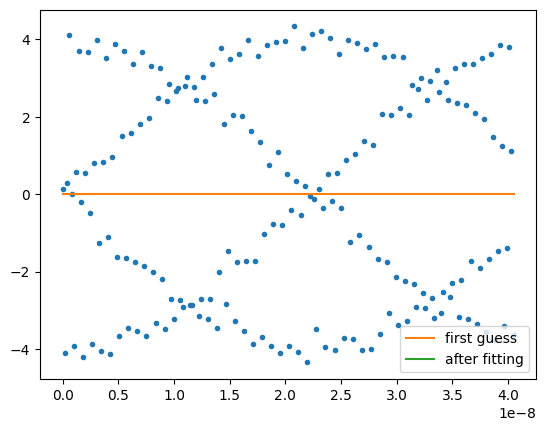

In [69]:
# This file is being used to test interpolation functions in order to smooth out ADC data for visual display

import numpy as np
from scipy.optimize import leastsq
import pylab as plt

# N = 1000 # number of data points
# t = np.linspace(0, 4*np.pi, N)
# f = 1.15247 # Optional!! Advised not to use
# data = 3.0*np.sin(f*t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

data = summed_signal # create artificial data with noise

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)#/(2**0.5)
guess_phase = 0
guess_freq = 1.24e9
guess_amp = 4

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,max(t),0.1)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

plt.plot(t, data, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()

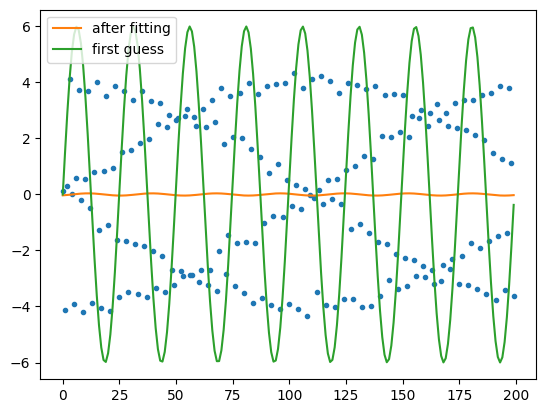

In [70]:
from scipy.optimize import curve_fit
# N = 1000 # number of data points
# t = np.linspace(0, 4*np.pi, N)
# data = 3.0*np.sin(t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

guess_freq = 1.24e9
guess_amplitude = 3*np.std(data)/(2**0.5)
guess_phase = 0
guess_offset = np.mean(data)

p0=[guess_freq, guess_amplitude,
    guess_phase, guess_offset]

# create the function we want to fit
def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

# now do the fit
fit = curve_fit(my_sin, t, data, p0=p0)

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = my_sin(t, *p0)

# recreate the fitted curve using the optimized parameters
data_fit = my_sin(t, *fit[0])

plt.plot(data, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()